Nom de l'Entreprise : MetroSafe Insurance

1-Description de MetroSafe Insurance :

2-Mission :

In [66]:
# Importer les bibliothèques nécessaires
using DataFrames, CSV, Plots, Dates

1- Nombre de Collisions par Arrondissement

In [67]:
# Charger les données depuis un fichier CSV
data = CSV.File("NYC_Collisions.csv") |> DataFrame

Row,Collision ID,Dates,Times,Borough,Street_Name,Cross Street,Latitude,Longitude,Contributing_Factor,Vehicle_Type,Persons_Injured,Persons_Killed,Pedestrians_Injured,Pedestrians_Killed,Cyclists_Injured,Cyclists_Killed,Motorists_Injured,Motorists_Killed
,Int64,String15,Time,String15?,String?,String?,Float64?,Float64?,String?,String31,Int64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,4491746,1/1/2021,20:00:00,Bronx,Bruckner Expressway,missing,40.834,-73.8264,Pavement Slippery,Passenger Vehicle,0,0,0,0,0,0,0,0
2,4441905,1/1/2021,05:28:00,Brooklyn,Lafayette Avenue,missing,40.6873,-73.9737,Unspecified,Passenger Vehicle,0,0,0,0,0,0,0,0
3,4382769,1/1/2021,06:00:00,Staten Island,West Shore Expressway,missing,missing,missing,Fell Asleep,Passenger Vehicle,0,0,0,0,0,0,0,0
4,4380949,1/1/2021,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.8827,-73.8927,missing,Not Reported,0,0,0,0,0,0,0,0
5,4380940,1/1/2021,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.6379,-73.9786,Unspecified,Passenger Vehicle,0,0,0,0,0,0,0,0
6,4380963,1/1/2021,18:45:00,Manhattan,Harlem River Drive,missing,40.8486,-73.9276,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Passenger Vehicle,0,0,0,0,0,0,0,0
7,4381116,1/1/2021,04:51:00,Brooklyn,Junius Street,missing,40.6601,-73.9005,Other Vehicular,Passenger Vehicle,0,0,0,0,0,0,0,0
8,4382500,1/1/2021,16:14:00,Brooklyn,Morgan Avenue,missing,40.7058,-73.9318,Passing Too Closely,Passenger Vehicle,0,0,0,0,0,0,0,0
9,4381082,1/1/2021,22:15:00,Brooklyn,Utica Avenue,East New York Avenue,40.6632,-73.9316,Unspecified,Passenger Vehicle,0,0,0,0,0,0,0,0


In [68]:
# Grouper les données par arrondissement et compter le nombre de collisions dans chaque groupe
borough_grouped = groupby(data, :Borough)
borough_count = combine(borough_grouped, nrow => :count)


Row,Borough,count
,String15?,Int64
1,Bronx,41255
2,Brooklyn,76416
3,Staten Island,11568
4,Manhattan,38234
5,Queens,63751
6,missing,7197


In [69]:
# Trier les arrondissements par nombre de collisions en ordre décroissant
sorted_boroughs = sort(borough_count, :count, rev=true)

Row,Borough,count
,String15?,Int64
1,Brooklyn,76416
2,Queens,63751
3,Bronx,41255
4,Manhattan,38234
5,Staten Island,11568
6,missing,7197


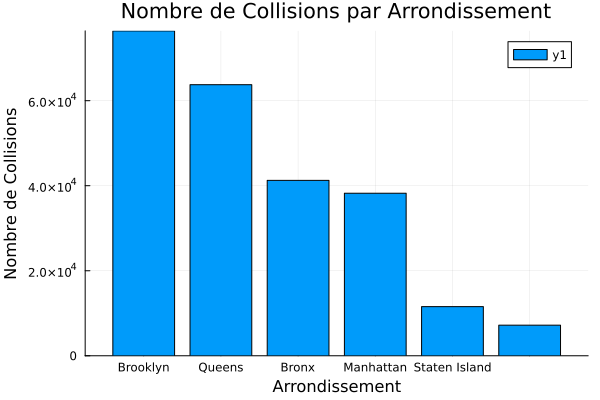

In [70]:
# Créer un graphique en barres montrant le nombre de collisions par arrondissement
bar(sorted_boroughs.Borough, sorted_boroughs.count, title="Nombre de Collisions par Arrondissement", xlabel="Arrondissement", ylabel="Nombre de Collisions")

2. Évolution du Nombre de Collisions au Fil du Temps

In [71]:
# Convertir les chaînes de caractères représentant des dates en objets Date
data.Dates = Date.(data.Dates, "m/d/Y")

238421-element Vector{Date}:
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 2021-01-01
 ⋮
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09
 2023-04-09

In [72]:
# Grouper les données par date et compter le nombre de collisions pour chaque date
data_grouped = groupby(data, :Dates)
data_monthly = combine(data_grouped, nrow => :count)

Row,Dates,count
,Date,Int64
1,2021-01-01,257
2,2021-01-02,220
3,2021-01-03,186
4,2021-01-04,242
5,2021-01-05,228
6,2021-01-06,220
7,2021-01-07,285
8,2021-01-08,272
9,2021-01-09,244


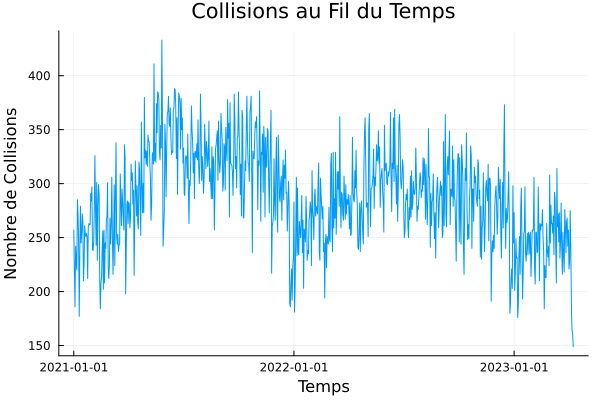

In [73]:
# Créer un graphique linéaire montrant l'évolution du nombre de collisions au fil du temps
plot(data_monthly.Dates, data_monthly.count, title="Collisions au Fil du Temps", xlabel="Temps", ylabel="Nombre de Collisions", legend=false)

3. Répartition des Types de Véhicules Impliqués

In [74]:
# Grouper les données par type de véhicule et compter le nombre d'occurrences de chaque type
vehicle_grouped = groupby(data, :Vehicle_Type)
vehicle_counts = combine(vehicle_grouped, nrow => :count)

Row,Vehicle_Type,count
,String31,Int64
1,Passenger Vehicle,201842
2,Not Reported,3126
3,Taxi,6015
4,Emergency Services,1823
5,Bicycle,5533
6,Transport,6642
7,Bus,4197
8,Scooter,2137
9,Limousine,97


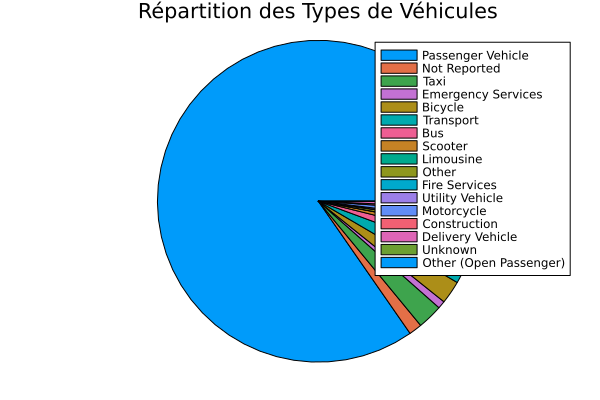

In [75]:
# Créer un graphique en camembert montrant la proportion des différents types de véhicules impliqués dans les collisions
pie(vehicle_counts.Vehicle_Type, vehicle_counts.count, title="Répartition des Types de Véhicules")

4. Analyse des Causes Principales des Collisions

In [76]:
# Grouper les données par facteur contributif et compter le nombre d'occurrences de chaque facteur
factor_grouped = groupby(data, :Contributing_Factor)
factor_counts = combine(factor_grouped, nrow => :count)

Row,Contributing_Factor,count
,String?,Int64
1,Pavement Slippery,1879
2,Unspecified,58262
3,Fell Asleep,1109
4,missing,1287
5,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,2233
6,Other Vehicular,6494
7,Passing Too Closely,9132
8,Following Too Closely,15519
9,Turning Improperly,5384


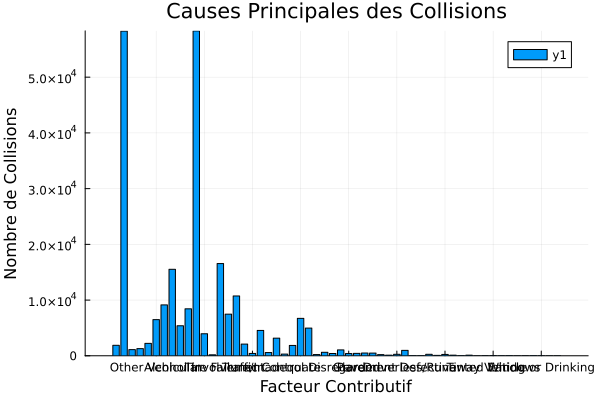

In [77]:
# Créer un graphique en barres montrant les causes principales des collisions
bar(factor_counts.Contributing_Factor, factor_counts.count, title="Causes Principales des Collisions", xlabel="Facteur Contributif", ylabel="Nombre de Collisions")

5. Nombre de Victimes par Catégorie

In [78]:
# Calculer les totaux de victimes dans différentes catégories
total_persons_injured = sum(data[!, :Persons_Injured])
total_persons_killed = sum(data[!, :Persons_Killed])
total_pedestrians_injured = sum(data[!, :Pedestrians_Injured])
total_pedestrians_killed = sum(data[!, :Pedestrians_Killed])
total_cyclists_injured = sum(data[!, :Cyclists_Injured])
total_cyclists_killed = sum(data[!, :Cyclists_Killed])
total_motorists_injured = sum(data[!, :Motorists_Injured])
total_motorists_killed = sum(data[!, :Motorists_Killed])

268

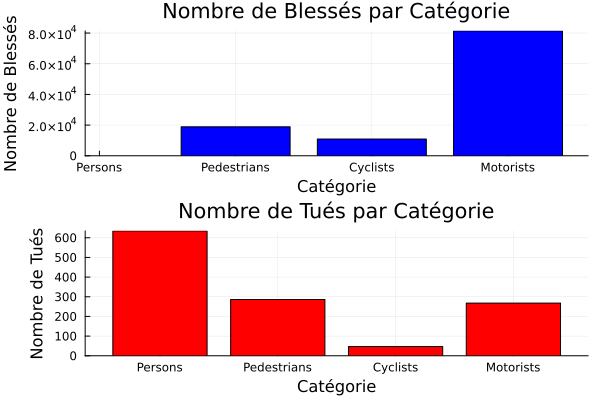

In [79]:
# Créer des graphiques en barres pour visualiser le nombre de victimes par catégorie
categories = ["Persons", "Pedestrians", "Cyclists", "Motorists"]
injured = [total_persons_injured, total_pedestrians_injured, total_cyclists_injured, total_motorists_injured]
killed = [total_persons_killed, total_pedestrians_killed, total_cyclists_killed, total_motorists_killed]
p1 = bar(categories, injured, title="Nombre de Blessés par Catégorie", xlabel="Catégorie", ylabel="Nombre de Blessés", color=:blue)
p2 = bar(categories, killed, title="Nombre de Tués par Catégorie", xlabel="Catégorie", ylabel="Nombre de Tués", color=:red)
plot(p1, p2, layout=(2,1), legend=false)